In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render li, div.text_cell_render p, code{font-size:22pt; line-height:40px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것
1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) :
https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 교안 6page

In [14]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 갯수
                          n_features=2,  # 독립변수 개수(기본값 20)
                          n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                          n_redundant=0,   # 타겟변수에 영향을 미치지 않는 독립변수 갯수
                          n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹이 없음
                          n_classes=2, # 타겟변수의 그룹수 
                          random_state=123)
import numpy as np
print(X.shape, y.shape)
np.c_[X, y][:3]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

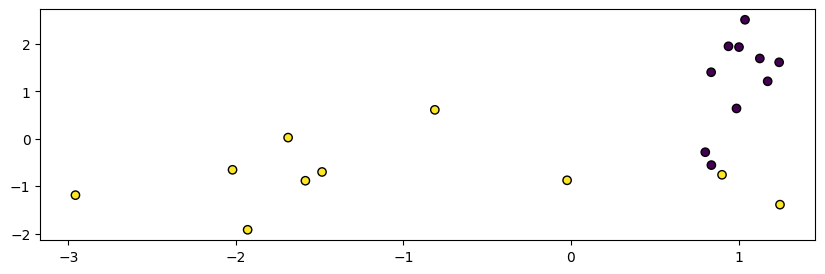

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=y, edgecolors='k')
plt.show()

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 군의 갯수
              init='k-means++', # 초기 중심점을 서로 멀리. random(초기중심점랜덤)
              n_init=10,  # 각 다른 초기값으로 10번 실행해 보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [35]:
centers = model.cluster_centers_ # 각 그룹의 중심점
print('model.labels :', model.labels_)
pred = model.predict(X)
print('  예 측 값   :', pred)
print('  실 제 값   :', y)

model.labels : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  예 측 값   : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  실 제 값   : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


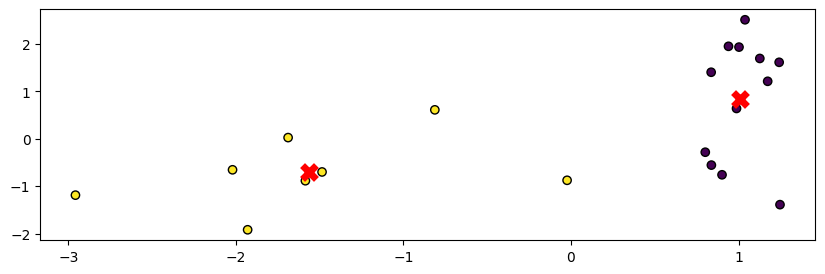

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='r', marker='x', s=100, lw=5)
plt.show()

## cf Normalizer(스케일러) 적용

In [43]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [44]:
model = KMeans(n_clusters=2,
              init='random',
              n_init='auto', #init가 k-means++이면 1, init가 random이면 10
              max_iter=300)
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [52]:
# 0그룹으로 분류된 Xnor
Xnor[model.labels_==0, 0] # x축
Xnor[model.labels_==0, 1] # y축

array([ 0.92411441,  0.88789162, -0.64410538,  0.85921456, -0.55183889,
        0.83284742, -0.33227958,  0.90097328,  0.79255068, -0.74396888,
        0.54408875,  0.7188508 ])

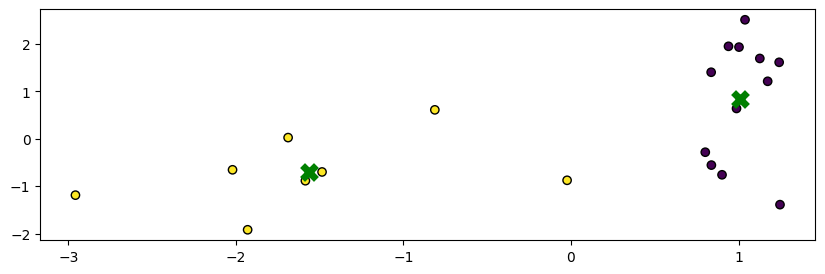

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='g', marker='x', s=100, lw=5)
plt.show()